In [1]:
from tfn.preprocess import Dataset
import os
os.chdir('../')

import numpy as np
import pandas as pd

#VISUALISATION
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams
import seaborn as sns

import re
from collections import Counter
import seaborn as sns
import string
import spacy
from spacy.lemmatizer import Lemmatizer

import urllib.parse as urlparse

In [2]:
data = Dataset('twitter')

X_train, X_test = data.X_train, data.X_test
X = np.array(X_train + X_test)

y_train, y_test = data.y_train, data.y_test
y = np.array(y_train + y_test)


In [116]:
### PLOT SETUP ###

COLOR_0 = '#00203F'
COLOR_1 = '#ADEFD1'

COLOR_NEG = '#87EBA8'
COLOR_NEU = '#EEEEEE'
COLOR_POS = '#F28268'
COLOR_OTH = '#7389AE'

TITLE_SIZE = 16
SUBTITLE_SIZE = 14
TICK_SIZE = 11

plt.style.use('seaborn-paper')

rcParams['font.size'] = TICK_SIZE

In [4]:
num_0 = y[y == 0].size
num_1 = y[y == 1].size

Text(0.5, 1.0, 'Proportion of Tweets')

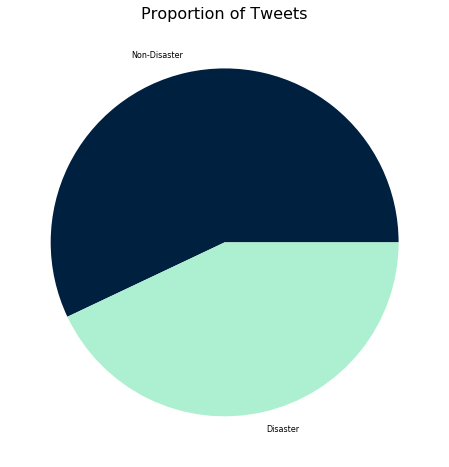

In [5]:
fig1, ax = plt.subplots(figsize=(8,8))

ax.pie((num_0, num_1), labels=['Non-Disaster', 'Disaster'], colors=[COLOR_0, COLOR_1])
ax.set_title('Proportion of Tweets', fontsize=TITLE_SIZE)

# Most Frequent Words

C:\Apps\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Apps\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 137 missing from current font.
  font.load_char(ord(s), flags=flags)


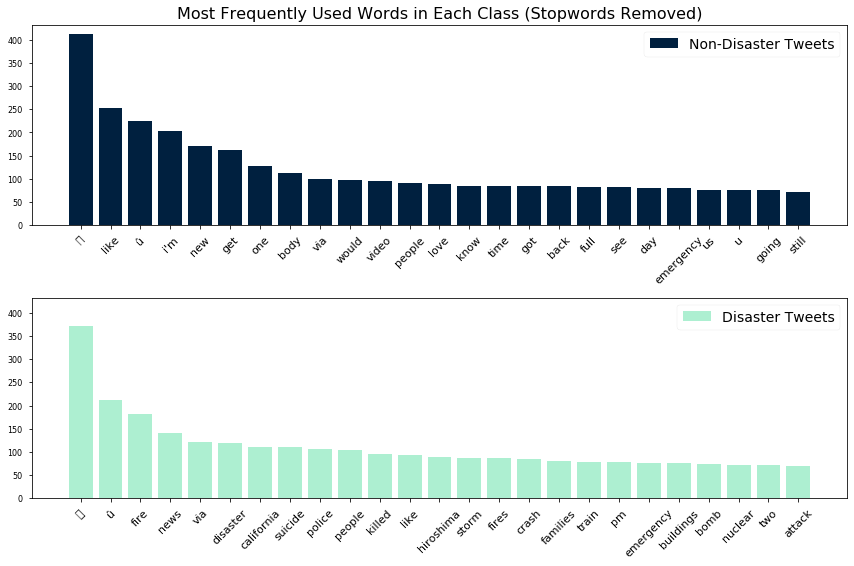

In [6]:
all_words_0 = []
all_words_1 = []
for i, _ in enumerate(X):
    if y[i] == 0:
        all_words_0 += X[i]
    elif y[i] == 1:
        all_words_1 += X[i]
    else:
        print('Hey, something weird\'s happening...')
        

c0 = list(Counter(all_words_0).items())
c0.sort(key=lambda x: x[1], reverse=True)

c1 = list(Counter(all_words_1).items())
c1.sort(key=lambda x: x[1], reverse=True)


fig2, ax = plt.subplots(2, 1, figsize=(12,8), sharey=True)
ax[0].bar(*zip(*c0[:25]), color=COLOR_0, label='Non-Disaster Tweets')
ax[0].tick_params(axis='x', rotation=45, labelsize=TICK_SIZE)
ax[0].legend(fontsize=SUBTITLE_SIZE)
ax[1].bar(*zip(*c1[:25]), color=COLOR_1, label='Disaster Tweets')
ax[1].tick_params(axis='x', rotation=45, labelsize=TICK_SIZE)
ax[1].legend(fontsize=SUBTITLE_SIZE)
ax[0].set_title('Most Frequently Used Words in Each Class (Stopwords Removed)', fontsize=TITLE_SIZE)
fig2.tight_layout()
#Maybe change colour based on sentiment of word?

# Emoji usage in each class

Text(0.5, 0.98, 'Percentage of tweets containing # Emojis')

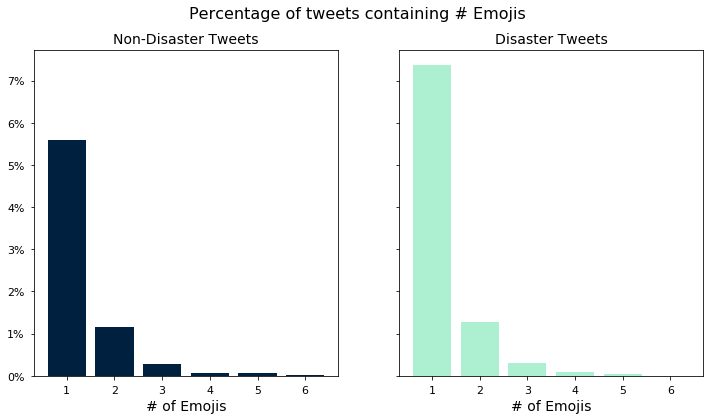

In [7]:
emoji_count_0 = []
emoji_count_1 = []

for i,x in enumerate(X):
    if y[i] == 0:
        emoji_count_0.append(x.count('\x89'))
    elif y[i] == 1:
        emoji_count_1.append(x.count('\x89'))

emoji_count_0 = Counter(emoji_count_0)
emoji_count_1 = Counter(emoji_count_1)

y_count = Counter(y)

emoji_count_0_prop = list({key: value / y_count[0] for key, value in emoji_count_0.items()}.items())
emoji_count_1_prop = list({key: value / y_count[1] for key, value in emoji_count_1.items()}.items())

emoji_count_0_prop.sort(key=lambda x: x[0])
emoji_count_1_prop.sort(key=lambda x: x[0])

emoji_count_0_prop = emoji_count_0_prop[1:]
emoji_count_1_prop = emoji_count_1_prop[1:]

fig3, ax = plt.subplots(1,2, figsize=(12,6), sharey=True, sharex=True)

ax[0].bar(*zip(*emoji_count_0_prop), color=COLOR_0)
ax[0].set_title('Non-Disaster Tweets', fontsize=SUBTITLE_SIZE)
ax[1].bar(*zip(*emoji_count_1_prop), color=COLOR_1)
ax[1].set_title('Disaster Tweets', fontsize=SUBTITLE_SIZE)

ax[0].get_yaxis().set_major_formatter(
    FuncFormatter(lambda x, p: format(f'{int(100*x)}%')))

ax[0].set_xlabel('# of Emojis', fontsize=SUBTITLE_SIZE)
ax[1].set_xlabel('# of Emojis', fontsize=SUBTITLE_SIZE)

ax[0].tick_params(labelsize=TICK_SIZE)
ax[1].tick_params(labelsize=TICK_SIZE)

fig3.suptitle('Percentage of tweets containing # Emojis', fontsize=TITLE_SIZE)

# Number of Words / URLs

In [8]:
df = pd.DataFrame(zip(X,y), columns=['X', 'y'])
df['Num Words'] = df['X'].apply(len)
df['Contains URL'] = df['X'].apply(lambda x: len(re.findall('https?://t\.co', ' '.join(x))))

summary = df.groupby('y').mean()

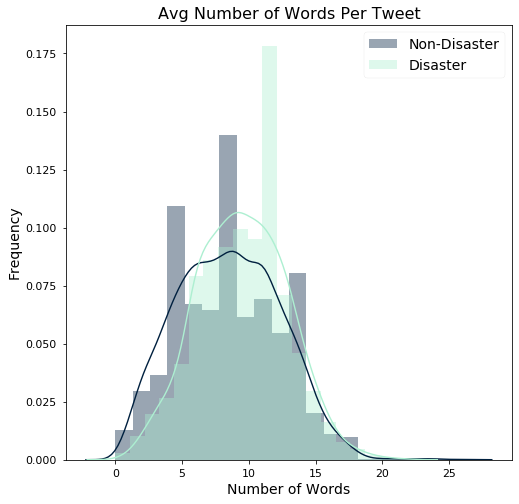

In [103]:
fig4, ax = plt.subplots(figsize=(8,8))

sns.distplot(df['Num Words'][df['y']==0], bins=20, color=COLOR_0, ax=ax, label='Non-Disaster')
sns.distplot(df['Num Words'][df['y']==1], bins=20, color=COLOR_1, ax=ax, label='Disaster')

ax.set_title('Avg Number of Words Per Tweet', fontsize=TITLE_SIZE)

ax.tick_params(labelsize=TICK_SIZE)

ax.set_xlabel('Number of Words', fontsize=SUBTITLE_SIZE)
ax.set_ylabel('Frequency', fontsize=SUBTITLE_SIZE)
ax.legend(fontsize=SUBTITLE_SIZE)

[Text(0, 0, 'Non-Disaster'), Text(0, 0, 'Disaster')]

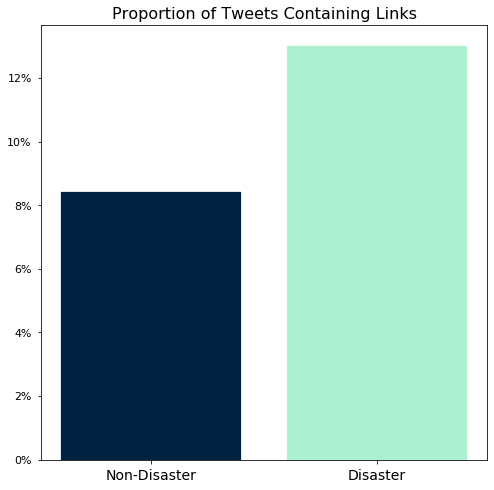

In [104]:
fig5, ax = plt.subplots(figsize=(8,8))
barlist = ax.bar(summary.index, summary['Contains URL'].values)
barlist[0].set_color(COLOR_0)
barlist[1].set_color(COLOR_1)
ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda x, p: format(f'{int(100*x)}%')))
ax.set_title('Proportion of Tweets Containing Links', fontsize=TITLE_SIZE)

ax.tick_params(labelsize=TICK_SIZE)

ax.set_xticks([0,1])
ax.set_xticklabels(['Non-Disaster', 'Disaster'], fontsize=SUBTITLE_SIZE)

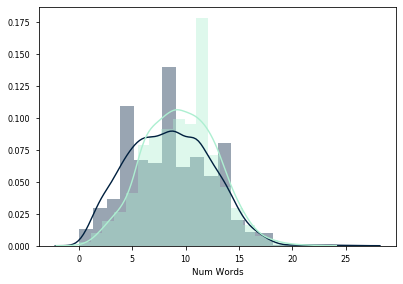

In [90]:
import seaborn as sns
sns.distplot(df['Num Words'][df['y']==0], bins=20, color=COLOR_0)
sns.distplot(df['Num Words'][df['y']==1], bins=20, color=COLOR_1)

Tweets referring to disasters are slightly longer in length than other tweets, comprising of around 9.5 words on average compared with 8.5 words for the latter.

Disaster tweets also contains links to external webpages 13.0% of the time - significantly more frequent than other tweets at 8.4%.

# POS & Punctuation Analysis

In [10]:
_TRAIN_DATA_PATH = 'tfn/data/train.csv'

In [11]:
raw_data = pd.read_csv(_TRAIN_DATA_PATH, header=0)
X_raw = raw_data['text'].to_numpy()
y_raw = raw_data['target'].to_numpy()

In [12]:
en = spacy.load('en_core_web_sm')
lemmatize = en.Defaults.create_lemmatizer()

In [13]:
POS_LIST = ["ADJ", "ADP", "ADV", "AUX", "CONJ", "CCONJ", "DET", "INTJ", "NOUN", "NUM", "PART", "PRON", "PROPN", "PUNCT", "SCONJ", "SYM", "VERB", "X", "SPACE"]            

punc = {0: Counter(), 1: Counter()}
pos = {0: Counter(), 1: Counter()}
for i, doc in enumerate(X_raw):
    punc[y[i]] += Counter([char for char in doc if char in string.punctuation])
    pos[y[i]] += Counter([token.pos_ for token in en(doc)])
    
punc['tot'] = punc[0] + punc[1]
pos['tot'] = pos[0] + pos[1]

for d in punc:
    punc[d] = dict(punc[d])
for d in pos:
    pos[d] = dict(pos[d])

for d in punc:
    for p in string.punctuation:
        if p not in punc[d]:
            punc[d][p] = 0
for d in pos:
    for p in POS_LIST:
        if p not in pos[d]:
            pos[d][p] = 0

In [14]:
punc_sorted = [(k,v/y_raw.shape[0]) for k,v in punc['tot'].items()]
punc_sorted.sort(key=lambda x: x[1], reverse=True)

pos_sorted = [(k,v/y_raw.shape[0]) for k,v in pos['tot'].items()]
pos_sorted.sort(key=lambda x: x[1], reverse=True)


punc_sorted_0 = [(k,v/y_raw[y_raw==0].shape[0]) for k,v in punc[0].items()]
punc_sorted_0.sort(key=lambda x: list(zip(*punc_sorted))[0].index(x[0]))

punc_sorted_1 = [(k,v/y_raw[y_raw==1].shape[0]) for k,v in punc[1].items()]
punc_sorted_1.sort(key=lambda x: list(zip(*punc_sorted))[0].index(x[0]))


pos_sorted_0 = [(k,v/y_raw[y_raw==0].shape[0]) for k,v in pos[0].items()]
pos_sorted_0.sort(key=lambda x: list(zip(*pos_sorted))[0].index(x[0]))

pos_sorted_1 = [(k,v/y_raw[y_raw==1].shape[0]) for k,v in pos[1].items()]
pos_sorted_1.sort(key=lambda x: list(zip(*pos_sorted))[0].index(x[0]))

In [15]:
def diff_func(a,b):
    m = max(a,b)
    if m > 0:
        return (a - b)/max(a,b)
    else:
        return 0

Text(0.5, 1.0, 'Difference in Punctuation Usage Per Tweet Between Disaster and non-Disaster Tweets')

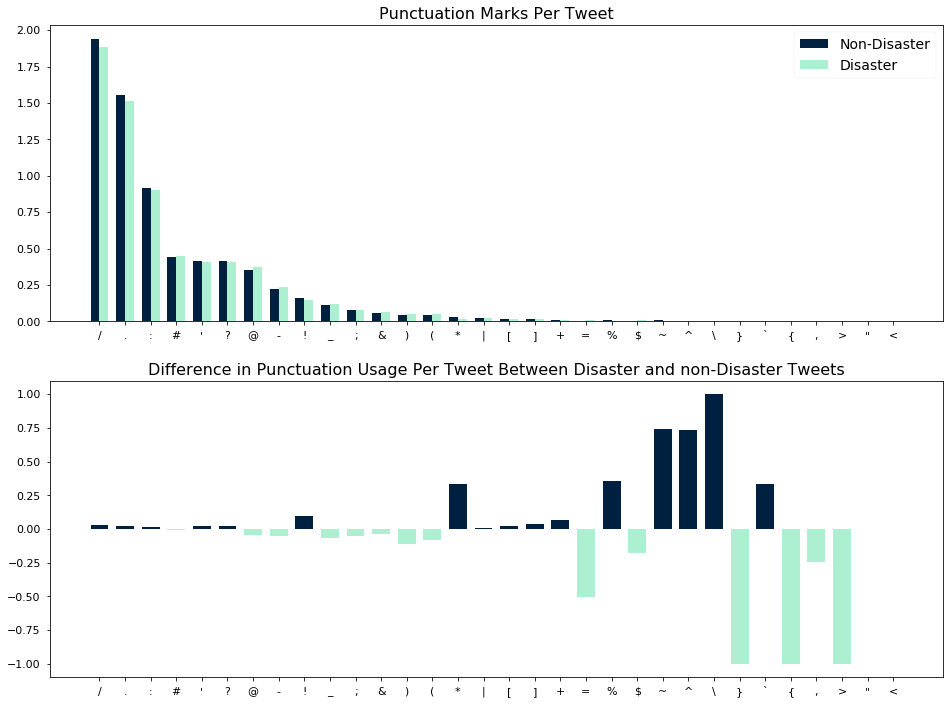

In [16]:
N = len(list(zip(*punc_sorted_0))[1])
ind = np.arange(N)
width = 0.35

fig6, ax = plt.subplots(2,1, figsize=(16,12))

ax[0].bar(ind, list(zip(*punc_sorted_0))[1], width, color=COLOR_0, label='Non-Disaster')
ax[0].bar(ind+width, list(zip(*punc_sorted_1))[1], width, color=COLOR_1, label='Disaster')

ax[0].set_xticks(ind + width / 2)
ax[0].set_xticklabels(list(zip(*punc_sorted_0))[0])

ax[0].legend(loc='best', fontsize=SUBTITLE_SIZE)

ax[0].tick_params(labelsize=TICK_SIZE)

ax[0].set_title('Punctuation Marks Per Tweet', fontsize=TITLE_SIZE)

color_0 = 'blue'
color_1 = 'orange'

N = len(list(zip(*punc_sorted_0))[1])
ind = np.arange(N)
width = 0.7

the_data = [diff_func(a,b) for a,b in zip(list(zip(*punc_sorted_0))[1],list(zip(*punc_sorted_1))[1])]

ax[1].bar(ind, the_data, width,
      color=[COLOR_0 if x > 0 else COLOR_1 for x in the_data])

ax[1].set_xticks(ind)
ax[1].set_xticklabels(list(zip(*punc_sorted_0))[0])

ax[1].tick_params(labelsize=TICK_SIZE)

ax[1].set_title('Difference in Punctuation Usage Per Tweet Between Disaster and non-Disaster Tweets', fontsize=TITLE_SIZE)

Text(0.5, 1.0, 'Difference in Part-Of-Speech Usage Per Tweet Between Disaster and non-Disaster Tweets')

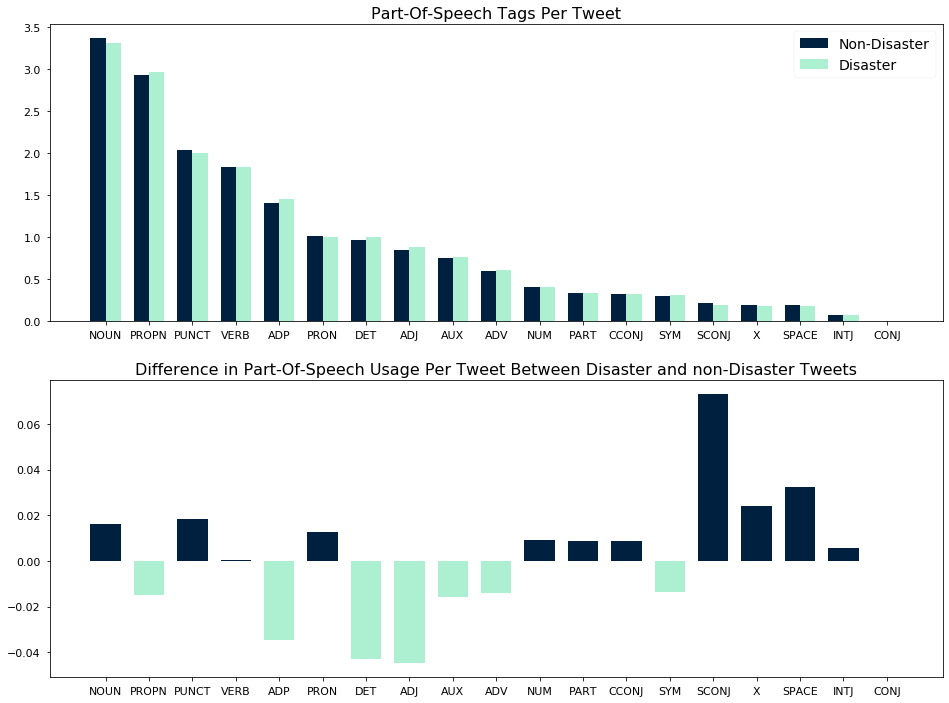

In [17]:
N = len(list(zip(*pos_sorted_0))[1])
ind = np.arange(N)
width = 0.35

fig7, ax = plt.subplots(2,1, figsize=(16,12))

ax[0].bar(ind, list(zip(*pos_sorted_0))[1], width, color=COLOR_0, label='Non-Disaster')
ax[0].bar(ind+width, list(zip(*pos_sorted_1))[1], width, color=COLOR_1, label='Disaster')

ax[0].set_xticks(ind + width / 2)
ax[0].set_xticklabels(list(zip(*pos_sorted_0))[0])

ax[0].legend(loc='best', fontsize=SUBTITLE_SIZE)

ax[0].tick_params(labelsize=TICK_SIZE)

ax[0].set_title('Part-Of-Speech Tags Per Tweet', fontsize=TITLE_SIZE)


N = len(list(zip(*pos_sorted_0))[1])
ind = np.arange(N)
width = 0.7

the_data = [diff_func(a,b) for a,b in zip(list(zip(*pos_sorted_0))[1],list(zip(*pos_sorted_1))[1])]

ax[1].bar(ind, the_data, width,
      color=[COLOR_0 if x > 0 else COLOR_1 for x in the_data])

ax[1].set_xticks(ind)
ax[1].set_xticklabels(list(zip(*pos_sorted_0))[0])

ax[1].tick_params(labelsize=TICK_SIZE)

ax[1].set_title('Difference in Part-Of-Speech Usage Per Tweet Between Disaster and non-Disaster Tweets', fontsize=TITLE_SIZE)

# Domain Analysis

In [18]:
_URL_DATA_PATH = 'tfn/data/url.csv'

In [19]:
url_data = pd.read_csv(_URL_DATA_PATH)

In [20]:
def get_domain(x):
    try:
        domain = urlparse.urlparse(x).netloc
        return domain.replace('www.', '').split(':')[0]
    except AttributeError:
        return None

url_data['domain'] = url_data['redirect_url'].apply(get_domain)

In [21]:
raw_data['twitter_urls'] = raw_data['text'].apply(lambda x: re.findall('https?://t.co/\w{10}', x))

rd2 = raw_data.explode('twitter_urls').dropna(subset=['twitter_urls'])

merged = pd.merge(rd2, url_data[['url', 'domain']], left_on='twitter_urls', right_on='url')

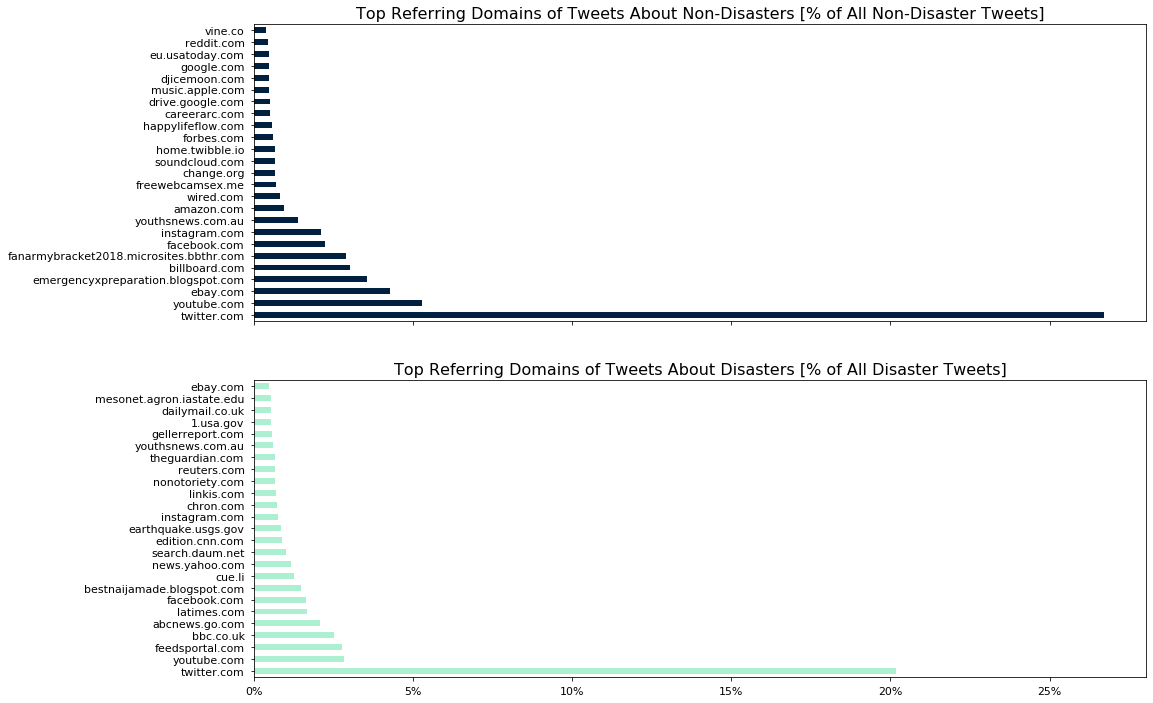

In [22]:
fig8, ax = plt.subplots(2,1, figsize=(16,12), sharex=True)

the_0s = merged['domain'][merged['target']==0]
the_1s = merged['domain'][merged['target']==1]

(the_0s.value_counts() / the_0s.count()).iloc[:25].plot(kind='barh', color=COLOR_0, ax=ax[0])
(the_1s.value_counts() / the_1s.count()).iloc[:25].plot(kind='barh', color=COLOR_1, ax=ax[1])

ax[0].set_title('Top Referring Domains of Tweets About Non-Disasters [% of All Non-Disaster Tweets]', fontsize=TITLE_SIZE)
ax[1].set_title('Top Referring Domains of Tweets About Disasters [% of All Disaster Tweets]', fontsize=TITLE_SIZE)

ax[0].get_xaxis().set_major_formatter(
    FuncFormatter(lambda x, p: format(f'{int(100*x)}%')))
ax[1].get_xaxis().set_major_formatter(
    FuncFormatter(lambda x, p: format(f'{int(100*x)}%')))
ax[0].tick_params(labelsize=TICK_SIZE)
ax[1].tick_params(labelsize=TICK_SIZE)

# Sentiment Analysis

In [ ]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [78]:
raw_data['Textblob'] = raw_data['text'].apply(lambda x: TextBlob(x).sentiment)

raw_data['Sentiment (Textblob)'] = raw_data['Textblob'].apply(lambda x: x[0])
raw_data['Subjectivity (Textblob)'] = raw_data['Textblob'].apply(lambda x: x[1])

raw_data['Vader'] = raw_data['text'].apply(lambda x: analyser.polarity_scores(x))

raw_data['Sentiment_Neg (Vader)'] = raw_data['Vader'].apply(lambda x: x['neg'])
raw_data['Sentiment_Neu (Vader)'] = raw_data['Vader'].apply(lambda x: x['neu'])
raw_data['Sentiment_Pos (Vader)'] = raw_data['Vader'].apply(lambda x: x['pos'])
raw_data['Sentiment_Comp (Vader)'] = raw_data['Vader'].apply(lambda x: x['compound'])

Text(0.5, 1.0, 'Average Sentiment and Subjectivity of Disaster/Non-Disaster Tweets')

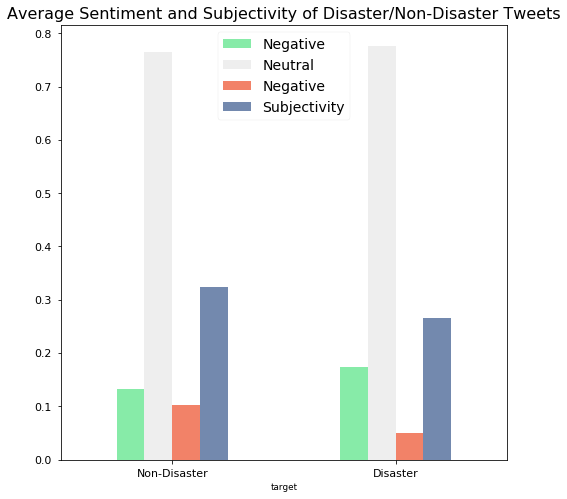

In [130]:
fig9, ax = plt.subplots(figsize=(8, 8))



raw_data[['Sentiment_Neg (Vader)', 'Sentiment_Neu (Vader)', 'Sentiment_Pos (Vader)', 'Subjectivity (Textblob)', 'target']] \
    .groupby('target') \
    .mean() \
    .plot(kind='bar', ax=ax, color=[COLOR_NEG, COLOR_NEU, COLOR_POS, COLOR_OTH])
ax.legend(labels=['Negative', 'Neutral', 'Negative', 'Subjectivity'], fontsize=SUBTITLE_SIZE)
ax.set_xticklabels(['Non-Disaster', 'Disaster'], fontsize=SUBTITLE_SIZE)
ax.tick_params(rotation=0, labelsize=TICK_SIZE)
ax.set_title('Average Sentiment and Subjectivity of Disaster/Non-Disaster Tweets', fontsize=TITLE_SIZE)

Text(0.5, 1.0, 'Distribution of Subjectivity Scores')

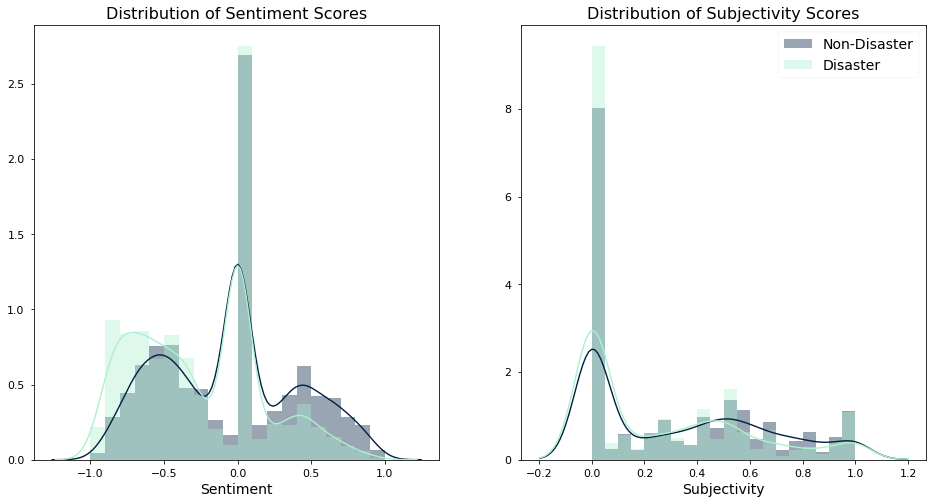

In [150]:
fig10, ax = plt.subplots(1,2, figsize=(16,8))

sns.distplot(raw_data['Sentiment_Comp (Vader)'][raw_data['target']==0], 
             bins=np.linspace(-1,1,21), 
             ax=ax[0], 
             color=COLOR_0)
sns.distplot(raw_data['Sentiment_Comp (Vader)'][raw_data['target']==1], 
             bins=np.linspace(-1,1,21),
             ax=ax[0], 
             color=COLOR_1)

ax[0].tick_params(labelsize=TICK_SIZE)
ax[0].set_xlabel('Sentiment',fontsize=SUBTITLE_SIZE)
ax[0].set_title('Distribution of Sentiment Scores',fontsize=TITLE_SIZE)

sns.distplot(raw_data['Subjectivity (Textblob)'][raw_data['target']==0], 
             bins=np.linspace(0,1,21), 
             ax=ax[1], 
             color=COLOR_0, 
             label='Non-Disaster')
sns.distplot(raw_data['Subjectivity (Textblob)'][raw_data['target']==1], 
             bins=np.linspace(0,1,21),
             ax=ax[1], 
             color=COLOR_1, 
             label='Disaster')
ax[1].legend(fontsize=SUBTITLE_SIZE)

ax[1].tick_params(labelsize=TICK_SIZE)
ax[1].set_xlabel('Subjectivity',fontsize=SUBTITLE_SIZE)
ax[1].set_title('Distribution of Subjectivity Scores',fontsize=TITLE_SIZE)

In [146]:
np.linspace(-1,1,21)

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [ ]:
fig1.savefig('Figures/class_proportion')
fig2.savefig('Figures/word_freq')
fig3.savefig('Figures/emoji_freq')
fig4.savefig('Figures/num_words')
fig5.savefig('Figures/contain_links')
fig6.savefig('Figures/punctuation')
fig7.savefig('Figures/part_of_speech')
fig8.savefig('Figures/domain_freq')